In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [127]:
rho = 0.75
means = [0,2]
vars = [[1,0.75],[0.75,1]]

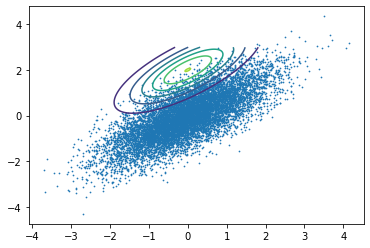

In [128]:
burn_in = 1000
draws = 10000

beta1 = np.zeros(burn_in+draws+1)
beta2 = np.zeros(burn_in+draws+1)

for i in np.arange(0,burn_in+draws,1):
  beta1[i+1] = rho * beta2[i] + np.sqrt(1-rho**2) * np.random.normal(0,1)
  beta2[i+1] = rho * beta1[i+1] + np.sqrt(1-rho**2) * np.random.normal(0,1)
beta1 = beta1[1000:burn_in+draws]
beta2 = beta2[1000:burn_in+draws]

# Visulization
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mean=means, cov=[[1,rho], [rho,1]])

fig,ax = plt.subplots()
temp = ax.scatter(beta1,beta2,s=0.5)
temp = ax.contour(x, y, rv.pdf(pos))
plt.show()
